    Case Study on Testing of Hypothesis
    A company started to invest in digital marketing as a new way of their product
    promotions. For that they collected data and decided to carry out a study on it.

Importing the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the file and displaying

In [3]:
data=pd.read_csv("C:/Users/tessl/Downloads/Sales_add.csv")

In [4]:
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


To check if there are null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [8]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

To check the 5 value summary,mean,standard deviation for understanding outliers

In [9]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


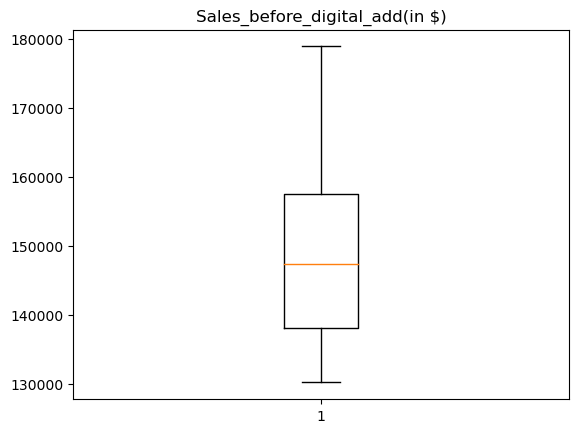

In [20]:
plt.boxplot(data["Sales_before_digital_add(in $)"])
plt.title("Sales_before_digital_add(in $)")
plt.show()

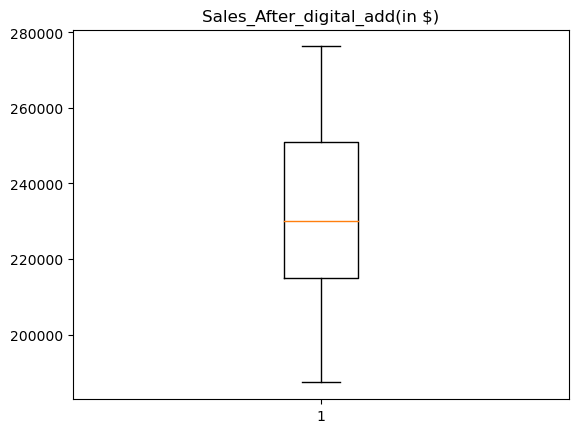

In [21]:
plt.boxplot(data["Sales_After_digital_add(in $)"])
plt.title("Sales_After_digital_add(in $)")
plt.show()

1 The company wishes to clarify whether there is any increase in sales after
  stepping into digital marketing.

Null Hypothesis
Ho : Sales After Digital Advertising will be less than or equal to the sales before Digital Advertising.
Alternate Hypothesis
H1 : Sales After Digital Advertising will be greater than the sales before usage of Digital Advertising.
The Confidence level is taken as 95%
The Level of Significance as alpha = 0.05.

In [24]:
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
sales_before = data[["Sales_before_digital_add(in $)"]]

sales_after = data[["Sales_After_digital_add(in $)"]]

#  Conducting a 2 sample 1 tail T test:

t_score, p = stats.ttest_rel(sales_after, sales_before, alternative="greater")
print("The Test statistic scores are : \nt-score = %0.3f , p-value = %0.3f \n" % (t_score, p) )

The Test statistic scores are : 
t-score = 12.091 , p-value = 0.000 



Comparing the calculated t-score with the critical value of t at 0.05 level of significance
t-score = 12.091
t_critical = 1.682

The Degree of Freedom = n-1
The Degree of Freedom = 22-1 = 21

In [26]:
t_critical = 1.721 
if t_score > t_critical:
    print("\nReject the Null Hypothesis\n\n")
elif t_score <= t_critical:
    print("\nFail to reject the Null Hypothesis\n")


Reject the Null Hypothesis




The calculated t-score > critical t-score value (i.e. at 5% or 0.05), We Reject the Null Hypothesis.
We can say that there is a significant increase in sales after doing Digital advertisements.

 2 The company needs to check whether there is any dependency between
   the features “Region” and “Manager”.

Null Hypothesis
Ho : There is no significant dependency between the Region and the Manager features.
Alternate Hypothesis
H1 : There is a significant amount of dependency between the Region and the Manager features.
The Confidence level is taken as 95%
The Level of Significance as alpha = 0.05.

In [31]:
data_compare = pd.crosstab(data["Region"],data["Manager"])
data_compare

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [32]:
stat, p, dof, expected = chi2_contingency(data_compare)

print(f"The Test chi-square value is :\t{stat:.3f}")
print(f"\nThe p-Value is :  \t{p:.3f}" )
print(f"\nThe Degree of freedom is : \t{dof}")

chi2_critical = 9.488 

if stat > chi2_critical:
    print(f"We'll reject the Null Hypothesis")
elif stat < chi2_critical:
    print ("\n\nWe're unable to Reject the Null Hypothesis")

The Test chi-square value is :	3.051

The p-Value is :  	0.549

The Degree of freedom is : 	4


We're unable to Reject the Null Hypothesis


The calculated chi2 value < Critical chi2 value at 0.05 significance level and the calculated p-value > 0.05. We're Unable to reject Null Hypothesis.
Hence,we can conclude that there is no significant relationship between the Region and Manager features.